In [1]:
include("unitTests.jl")
using LaTeXStrings  # For LaTeX-style labels

In [37]:
W=10
J1=1
J2=1
N=12
iters=500
probs=[]
for i=1:iters
    d=Uniform(-1,1)
    hz=W*rand(d, N)
    pbc=true
    bonds=bonds1D(N, pbc)
    
    H=constructTransverseHamiltonianNoSymmetrySxSzSy(bonds, N, J1, J2, "full", hz)
    eigtemp=eigen(Hermitian(H));
    initial_state=generate_initial_state(0.6, N)
    z=578
    for t=1:1:1000
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs, prob)
    end
end


In [56]:
sum(probs)

500000-element Vector{Any}:
 2.8357502003482472e-6
 4.077652243697626e-6
 1.0234986543314479e-5
 3.0551258508934187e-6
 1.1513891890459788e-6
 7.794593746047903e-6
 4.277044636008042e-6
 3.70486797468503e-6
 5.770482225619299e-8
 1.0388837142525832e-6
 1.9211190531983775e-7
 2.311735678254629e-6
 3.212045630712789e-6
 ⋮
 9.731419299401981e-6
 2.8116933723157745e-5
 3.985697996193728e-5
 6.40123947295098e-5
 7.013991045826958e-5
 2.3482703596885923e-5
 1.6117633597359356e-6
 7.643624569531747e-7
 4.6339134609600835e-5
 1.823142140101108e-5
 3.7694968816400255e-5
 1.762156923343976e-5

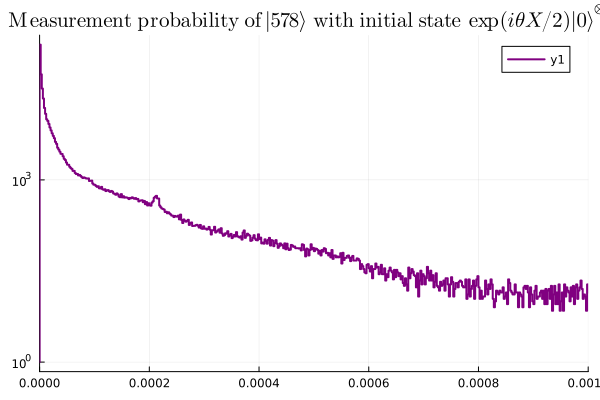

In [54]:
using LaTeXStrings  # For LaTeX-style labels

stephist((probs), title=L"\mathrm{Measurement\ probability\ of\ }|578\rangle\mathrm{\ with\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, binsize=50,color=:purple, yaxis=:log, xrange=(0,0.001))

# Model (Random Field Heisenberg Model)

$$
\begin{equation}
    \hat H = J\sum_{i=1}^{N} (\sigma^x_i\sigma^x_{i+1}+\sigma^y_i\sigma^y_{i+1}+\sigma^z_i\sigma^z_{i+1}) + \sum_{i=1}^N h_z[i]\sigma^z_i
\end{equation}
$$

# Procedure

1. Fully diagonalize ($h_i[z]$ uniformly sampled between $-W$ to $W$)
2. Initialize $\Psi(0)=\exp(i\theta X/2)|0\rangle^{\otimes N}$, $\theta=0.6$
3. Compute measurement probability of some computational basis vector $|z\rangle$. $|\langle z|\exp(-i\hat H t) \Psi\rangle|^2$.
4. Plot distribution of $|\langle z|\exp(-i\hat H t) \Psi\rangle|^2$ at different $t$.

# Large Disorder $W=10$

In [76]:
W=10
J1=1
J2=1
N=12
iters=1
probs_2=[]
    d=Uniform(-1,1)
    hz=W*rand(d, N)
    pbc=true
    bonds=bonds1D(N, pbc)
    
    H=constructTransverseHamiltonianNoSymmetrySxSzSy(bonds, N, J1, J2, "full", hz)
    eigtemp=eigen(Hermitian(H));
    initial_state=generate_initial_state(0.6, N)
    z=2893
    for t=1:1:5000
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs_2, prob)
    end


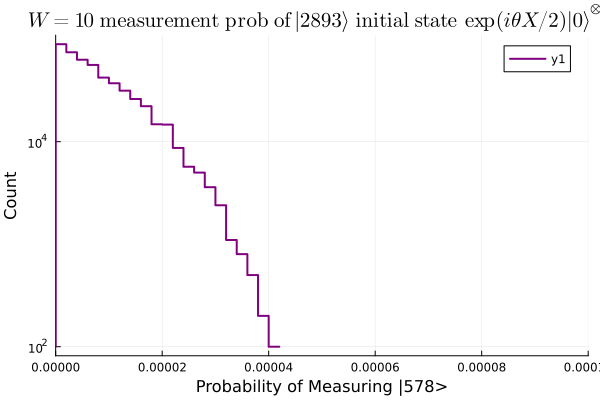

In [77]:
stephist((probs_2), title=L"W=10 \mathrm{\ measurement\ prob\ of\ }|2893\rangle\mathrm{\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, bins=20,color=:purple, yaxis=:log,xrange=(0,0.0001),xlabel="Probability of Measuring |578>", ylabel="Count")

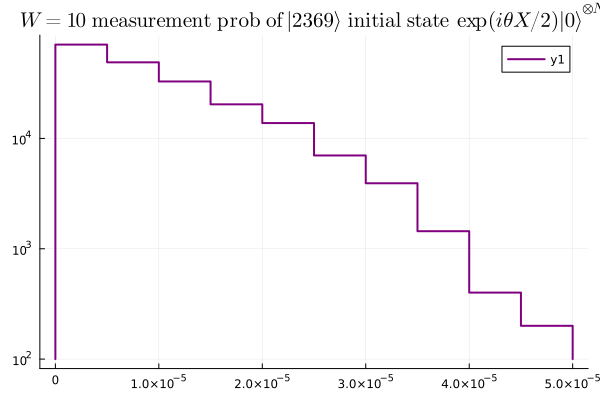

In [78]:
prob_3=[]
z=1273
    for t=1:0.1:500
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(prob_3, prob)
    end
stephist((prob_3), title=L"W=10 \mathrm{\ measurement\ prob\ of\ }|2369\rangle\mathrm{\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, yaxis=:log, bins=20,color=:purple)

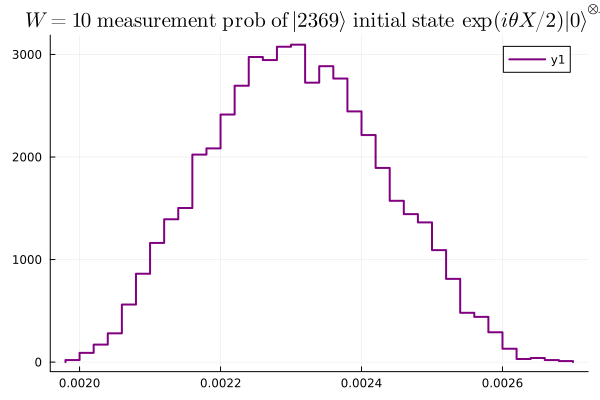

In [98]:
prob_3=[]
z=2328
    for t=1:0.1:500
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(prob_3, prob)
    end
stephist((prob_3), title=L"W=10 \mathrm{\ measurement\ prob\ of\ }|2369\rangle\mathrm{\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, bins=40,color=:purple)

# Small Disorder $W=1$

In [59]:
W=1
J1=1
J2=1
N=12
iters=1
probs_2=[]
    d=Uniform(-1,1)
    hz=W*rand(d, N)
    pbc=true
    bonds=bonds1D(N, pbc)
    
    H=constructTransverseHamiltonianNoSymmetrySxSzSy(bonds, N, J1, J2, "full", hz)
    eigtemp=eigen(Hermitian(H));
    initial_state=generate_initial_state(0.6, N)
    z=2893
    for t=1:1:5000
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs_2, prob)
    end


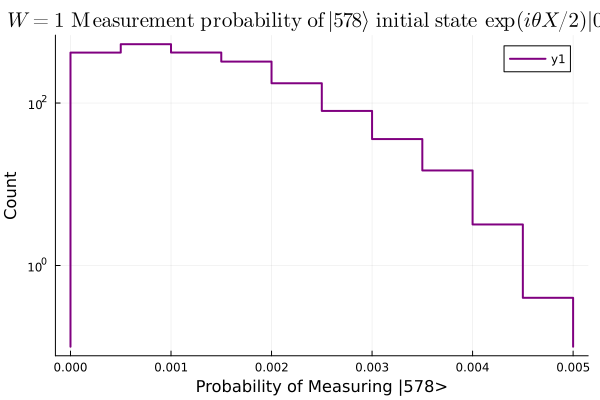

In [63]:
stephist((probs_2), title=L"W=1\mathrm{\ Measurement\ probability\ of\ }|578\rangle\mathrm{\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, bins=20,color=:purple, yaxis=:log,xlabel="Probability of Measuring |578>", ylabel="Count")

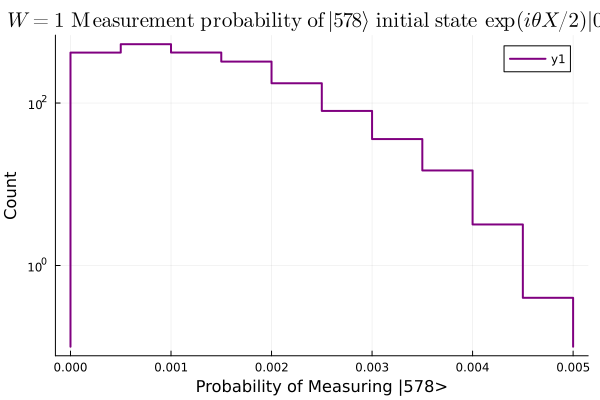

In [64]:
probs_3=[]

z=2893
    for t=1:1:5000
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs_3, prob)
    end

stephist((probs_3), title=L"W=1\mathrm{\ Measurement\ probability\ of\ }|578\rangle\mathrm{\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, bins=20,color=:purple, yaxis=:log,xlabel="Probability of Measuring |578>", ylabel="Count")

In [7]:
spacings=[]
for e in eigtemp2.values
    for e1 in eigtemp2.values
        push!(spacings, abs(e-e1))
    end
end

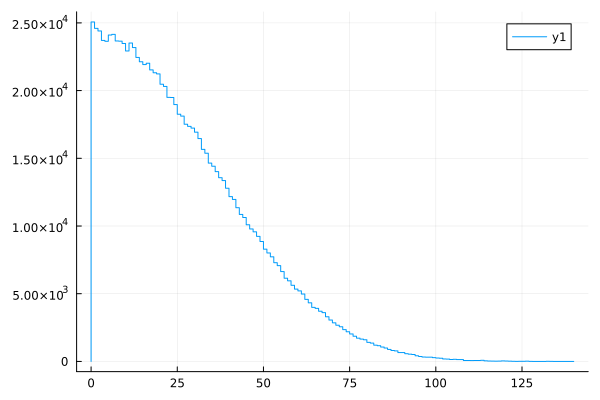

In [8]:
stephist(spacings)

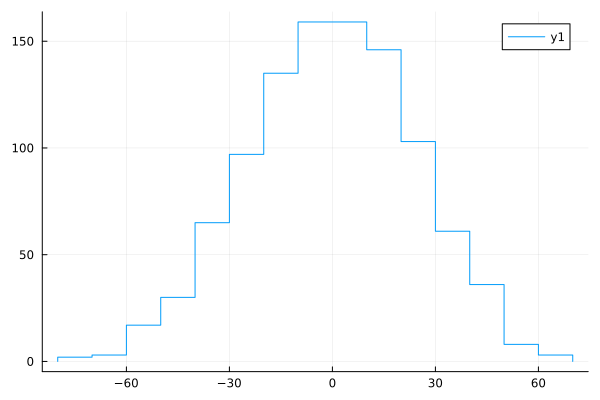

In [6]:
stephist(eigtemp2.values)

In [28]:
entanglements=[]
listA=[1,2,3,4]
initial_state=generate_initial_state(0.6, N)
        temps=[];
        for i=0:2^(N)-1
            push!(temps, i);
        end
z=540
    for t=1:0.1:300
        time_evolved_state=time_evolve_state(initial_state, eigtemp2.values, t)

        the_state=get_state_in_computational_basis(time_evolved_state, eigtemp2.vectors)
    
        entanglement=getEntanglementEntropy(the_state, temps, listA, N)
        push!(entanglements, entanglement)
    end

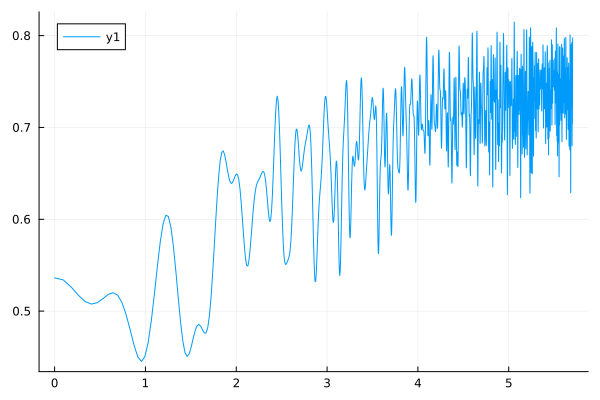

In [31]:
plot(log.(1:0.1:300), entanglements)

In [123]:
entanglements=[]
listA=[]
initial_state=generate_initial_state(0.6, N)
        temps=[];
        for i=0:2^(N)-1
            push!(temps, i);
        end
    for i=1:N-1
        push!(listA, i)
        #time_evolved_state=time_evolve_state(initial_state, eigtemp2.values, t)

        #the_state=get_state_in_computational_basis(time_evolved_state, eigtemp2.vectors)
    
        entanglement=getEntanglementEntropy(eigtemp2.vectors[:,2^6], temps, listA, N)
        push!(entanglements, entanglement)
    end

In [113]:
entanglements

11-element Vector{Any}:
 0.39506842235892514
 0.4723738485749514
 0.6381639270657292
 0.48495608965022874
 0.5603269595067871
 0.38433301591781344
 0.3930075175491712
 0.5175083229024263
 0.9307027215981782
 0.674158134159015
 0.6337893312101053

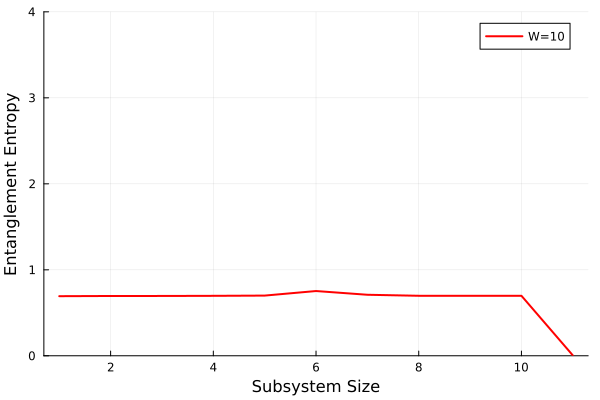

In [121]:
p=plot(1:N-1, entanglements, yrange=(0,4), linewidth=2, color=:red, xlabel="Subsystem Size", ylabel="Entanglement Entropy", label="W=10")


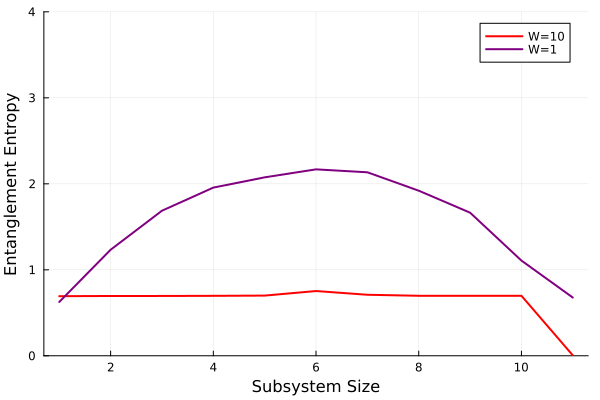

In [124]:
plot!(p, 1:N-1, entanglements, yrange=(0,4), linewidth=2, color=:purple, xlabel="Subsystem Size", ylabel="Entanglement Entropy", label="W=1")

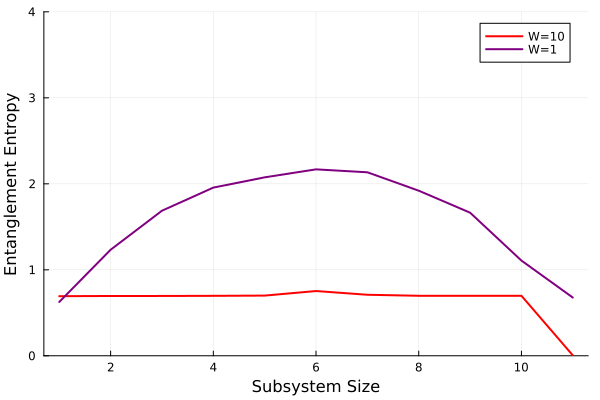

"/Users/jessica/Desktop/jan 9 2025/git/Square-Spin-Ice/New code/EE_growth.png"

In [125]:
display(p)
savefig(p,"EE_growth.png")

In [94]:
W = 1
J1 = 1
J2 = 1
N = 12
iters = 1
pbc = true

d = Uniform(-1, 1)
hz = W .* rand(d, N)
bonds = bonds1D(N, pbc)

H = constructTransverseHamiltonianNoSymmetrySxSzSy(bonds, N, J1, J2, "full", hz)
eigtemp = eigen(Hermitian(H))
initial_state = generate_initial_state(0.6, N)

4096-element Vector{ComplexF64}:
      0.577931533711268 + 0.0im
                    0.0 + 0.17877517316938119im
                    0.0 + 0.17877517316938119im
   -0.05530164159152731 + 0.0im
                    0.0 + 0.1787751731693812im
  -0.055301641591527326 + 0.0im
   -0.05530164159152732 + 0.0im
                   -0.0 - 0.017106802407178618im
                    0.0 + 0.17877517316938124im
   -0.05530164159152733 + 0.0im
  -0.055301641591527326 + 0.0im
                   -0.0 - 0.017106802407178618im
  -0.055301641591527326 + 0.0im
                        ⋮
                    0.0 + 1.4988346830823448e-5im
 -4.6364389964952074e-6 + 0.0im
  -4.636438996495207e-6 + 0.0im
                   -0.0 - 1.4342186507196323e-6im
                    0.0 + 1.4988346830823448e-5im
 -4.6364389964952074e-6 + 0.0im
  -4.636438996495207e-6 + 0.0im
                   -0.0 - 1.4342186507196323e-6im
  -4.636438996495207e-6 + 0.0im
                   -0.0 - 1.4342186507196323e-6im
                  

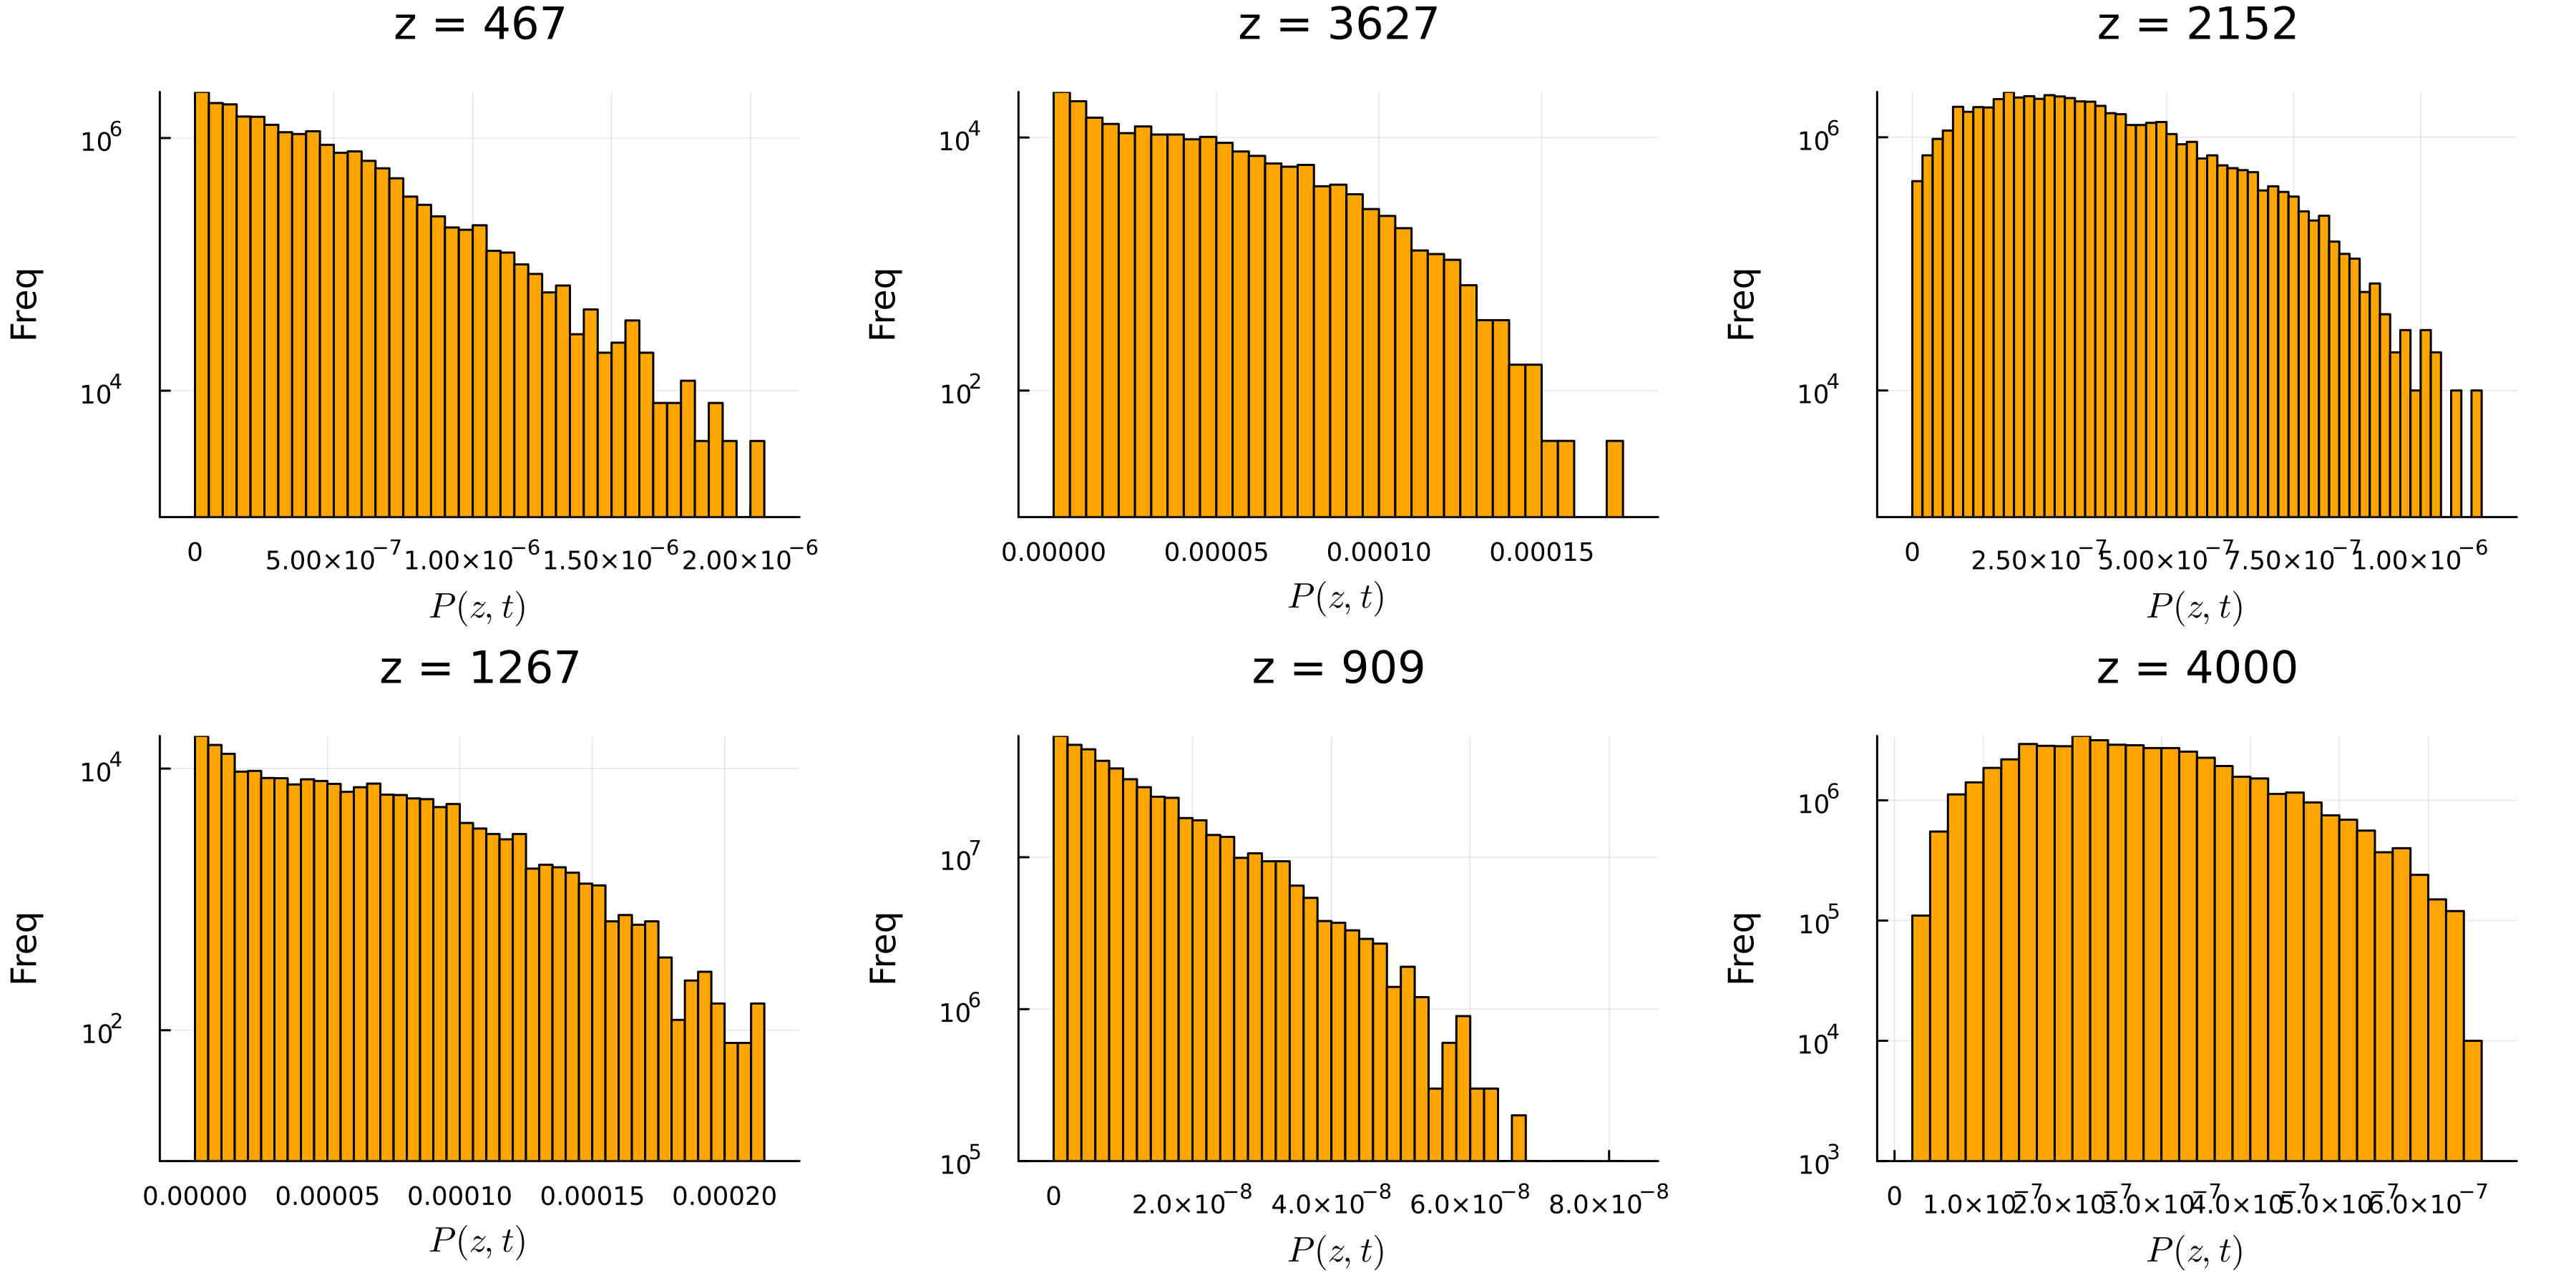

"/Users/jessica/Desktop/jan 9 2025/git/Square-Spin-Ice/New code/W=10_pzt_distributions_gaussians_2.png"

In [86]:
using Measures

time_steps = 1:5000
z_list = [467, 3627,2152,1267,909,4000]
probs_list = []

for z in z_list
    probs = Float64[]
    for t in time_steps
        time_evolved_state = time_evolve_state(initial_state, eigtemp.values, t)
        prob = get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs, prob)
    end
    push!(probs_list, probs)
end

# Plot in 2x3 grid
p=plot(layout = (2, 3), size = (1200, 600))
for (i, probs) in enumerate(probs_list)
    histogram!(probs, bins=50, layout = (2, 3), subplot = i, 
               title = "z = $(z_list[i])", xlabel = L"P(z,t)", ylabel = "Freq",yaxis=:log,
               legend = false, normalize = true,margin=5mm, dpi=300, color=:orange)
end
display(p)
savefig("W=10_pzt_distributions_gaussians_2.png")

In [59]:
get_probability_of_n_computational_basis(909, initial_state, eigtemp.vectors)

2.725486467209655e-6

In [61]:
get_probability_of_n_computational_basis(1267, initial_state, eigtemp.vectors)

0.0019097606506943705

In [62]:
get_probability_of_n_computational_basis(1452, initial_state, eigtemp.vectors)

0.0005349563721819385

In [65]:
get_probability_of_n_computational_basis(834, initial_state, eigtemp.vectors)

1.942595211915395e-7

In [63]:
get_probability_of_n_computational_basis(3031, initial_state, eigtemp.vectors)

2.5406864106314158e-6

In [64]:
get_probability_of_n_computational_basis(213, initial_state, eigtemp.vectors)

1.964892432209585e-7

z = 909: μ = 2.430490594986338e-6, σ = 6.611750379409716e-7
z = 1267: μ = 0.0010140032124026585, σ = 0.00032495523865331606
z = 1452: μ = 0.0008340237030391797, σ = 0.0003018602863377866


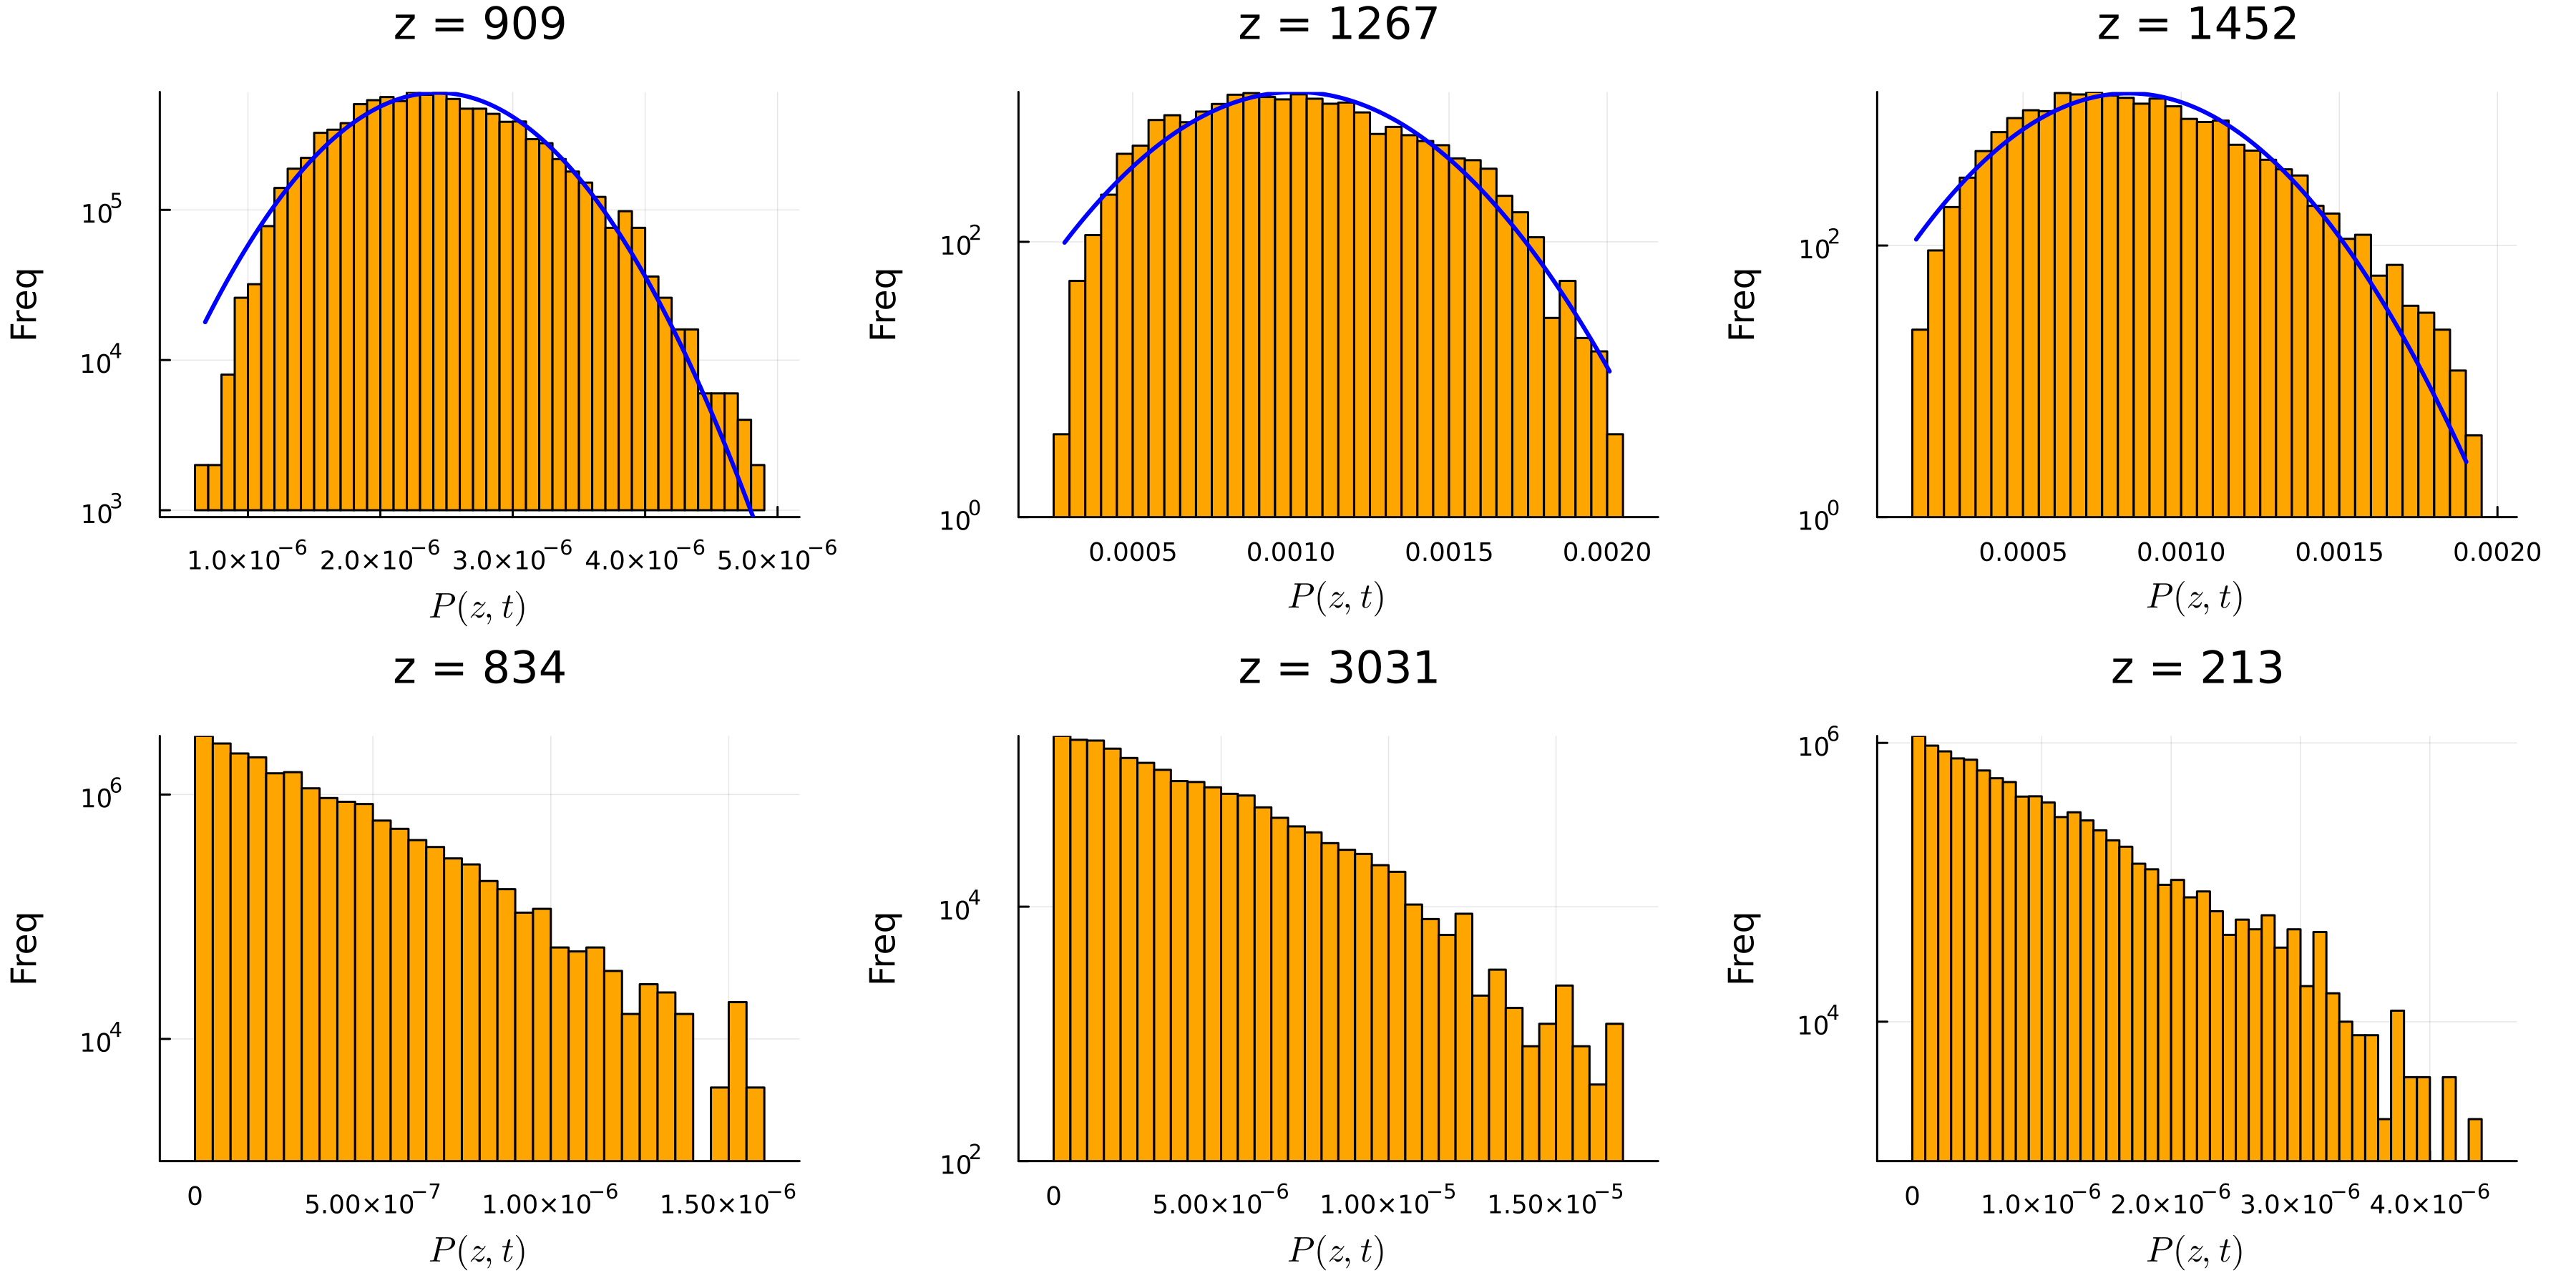

"/Users/jessica/Desktop/jan 9 2025/git/Square-Spin-Ice/New code/W=10_pzt_distributions_gaussian_fits_first_three.png"

In [72]:
time_steps = 1:5000
z_list = [909, 1267, 1452, 834, 3031, 213]
probs_list = []

# Collect probabilities for each z
for z in z_list
    probs = Float64[]
    for t in time_steps
        time_evolved_state = time_evolve_state(initial_state, eigtemp.values, t)
        prob = get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs, prob)
    end
    push!(probs_list, probs)
end

# Plot in 2x3 grid with Gaussian fits for first three z values
p = plot(layout = (2, 3), size = (1200, 600))
for (i, probs) in enumerate(probs_list)
    # Plot histogram
    histogram!(probs, bins = 50, layout = (2, 3), subplot = i,
               title = "z = $(z_list[i])", xlabel = L"P(z,t)", ylabel = "Freq",
               yaxis = :log, legend = false, normalize = true,
               margin = 5mm, dpi = 300, color = :orange)

    # Fit and overlay Gaussian for the first three
    if i ≤ 3
        μ̂, σ̂ = mean(probs), std(probs)
        fit_dist = Normal(μ̂, σ̂)
        x_range = range(minimum(probs), stop = maximum(probs), length = 200)
        plot!(x_range, pdf.(fit_dist, x_range), layout = (2, 3), subplot = i,
              lw = 2, linecolor = :blue, label = "Gaussian fit")

        println("z = $(z_list[i]): μ = $μ̂, σ = $σ̂")
    end
end

display(p)
savefig("W=10_pzt_distributions_gaussian_fits_first_three.png")


In [ ]:
using Measures

time_steps = 1:500
z_list = [909, 1267,1452,834,3031,213]
probs_list = []

for z in z_list
    probs = Float64[]
    for t in time_steps
        time_evolved_state = time_evolve_state(initial_state, eigtemp.values, t)
        prob = get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs, prob)
    end
    push!(probs_list, probs)
end

# Plot in 2x3 grid
p=plot(layout = (2, 3), size = (1200, 600))
for (i, probs) in enumerate(probs_list)
    histogram!(probs, bins=50, layout = (2, 3), subplot = i, 
               title = "z = $(z_list[i])", xlabel = L"P(z,t)", ylabel = "Freq",yaxis=:log,
               legend = false, normalize = true,margin=5mm, dpi=300, color=:orange)
end
display(p)
savefig("W=10_pzt_distributions_gaussians.png")

In [29]:
W = 1
J1 = 1
J2 = 1
N = 12
iters = 1
pbc = true

d = Uniform(-1, 1)
hz = W .* rand(d, N)
bonds = bonds1D(N, pbc)

H = constructTransverseHamiltonianNoSymmetrySxSzSy(bonds, N, J1, J2, "full", hz)
eigtemp = eigen(Hermitian(H))
initial_state = generate_initial_state(0.6, N)

4096-element Vector{ComplexF64}:
      0.577931533711268 + 0.0im
                    0.0 + 0.17877517316938119im
                    0.0 + 0.17877517316938119im
   -0.05530164159152731 + 0.0im
                    0.0 + 0.1787751731693812im
  -0.055301641591527326 + 0.0im
   -0.05530164159152732 + 0.0im
                   -0.0 - 0.017106802407178618im
                    0.0 + 0.17877517316938124im
   -0.05530164159152733 + 0.0im
  -0.055301641591527326 + 0.0im
                   -0.0 - 0.017106802407178618im
  -0.055301641591527326 + 0.0im
                        ⋮
                    0.0 + 1.4988346830823448e-5im
 -4.6364389964952074e-6 + 0.0im
  -4.636438996495207e-6 + 0.0im
                   -0.0 - 1.4342186507196323e-6im
                    0.0 + 1.4988346830823448e-5im
 -4.6364389964952074e-6 + 0.0im
  -4.636438996495207e-6 + 0.0im
                   -0.0 - 1.4342186507196323e-6im
  -4.636438996495207e-6 + 0.0im
                   -0.0 - 1.4342186507196323e-6im
                  

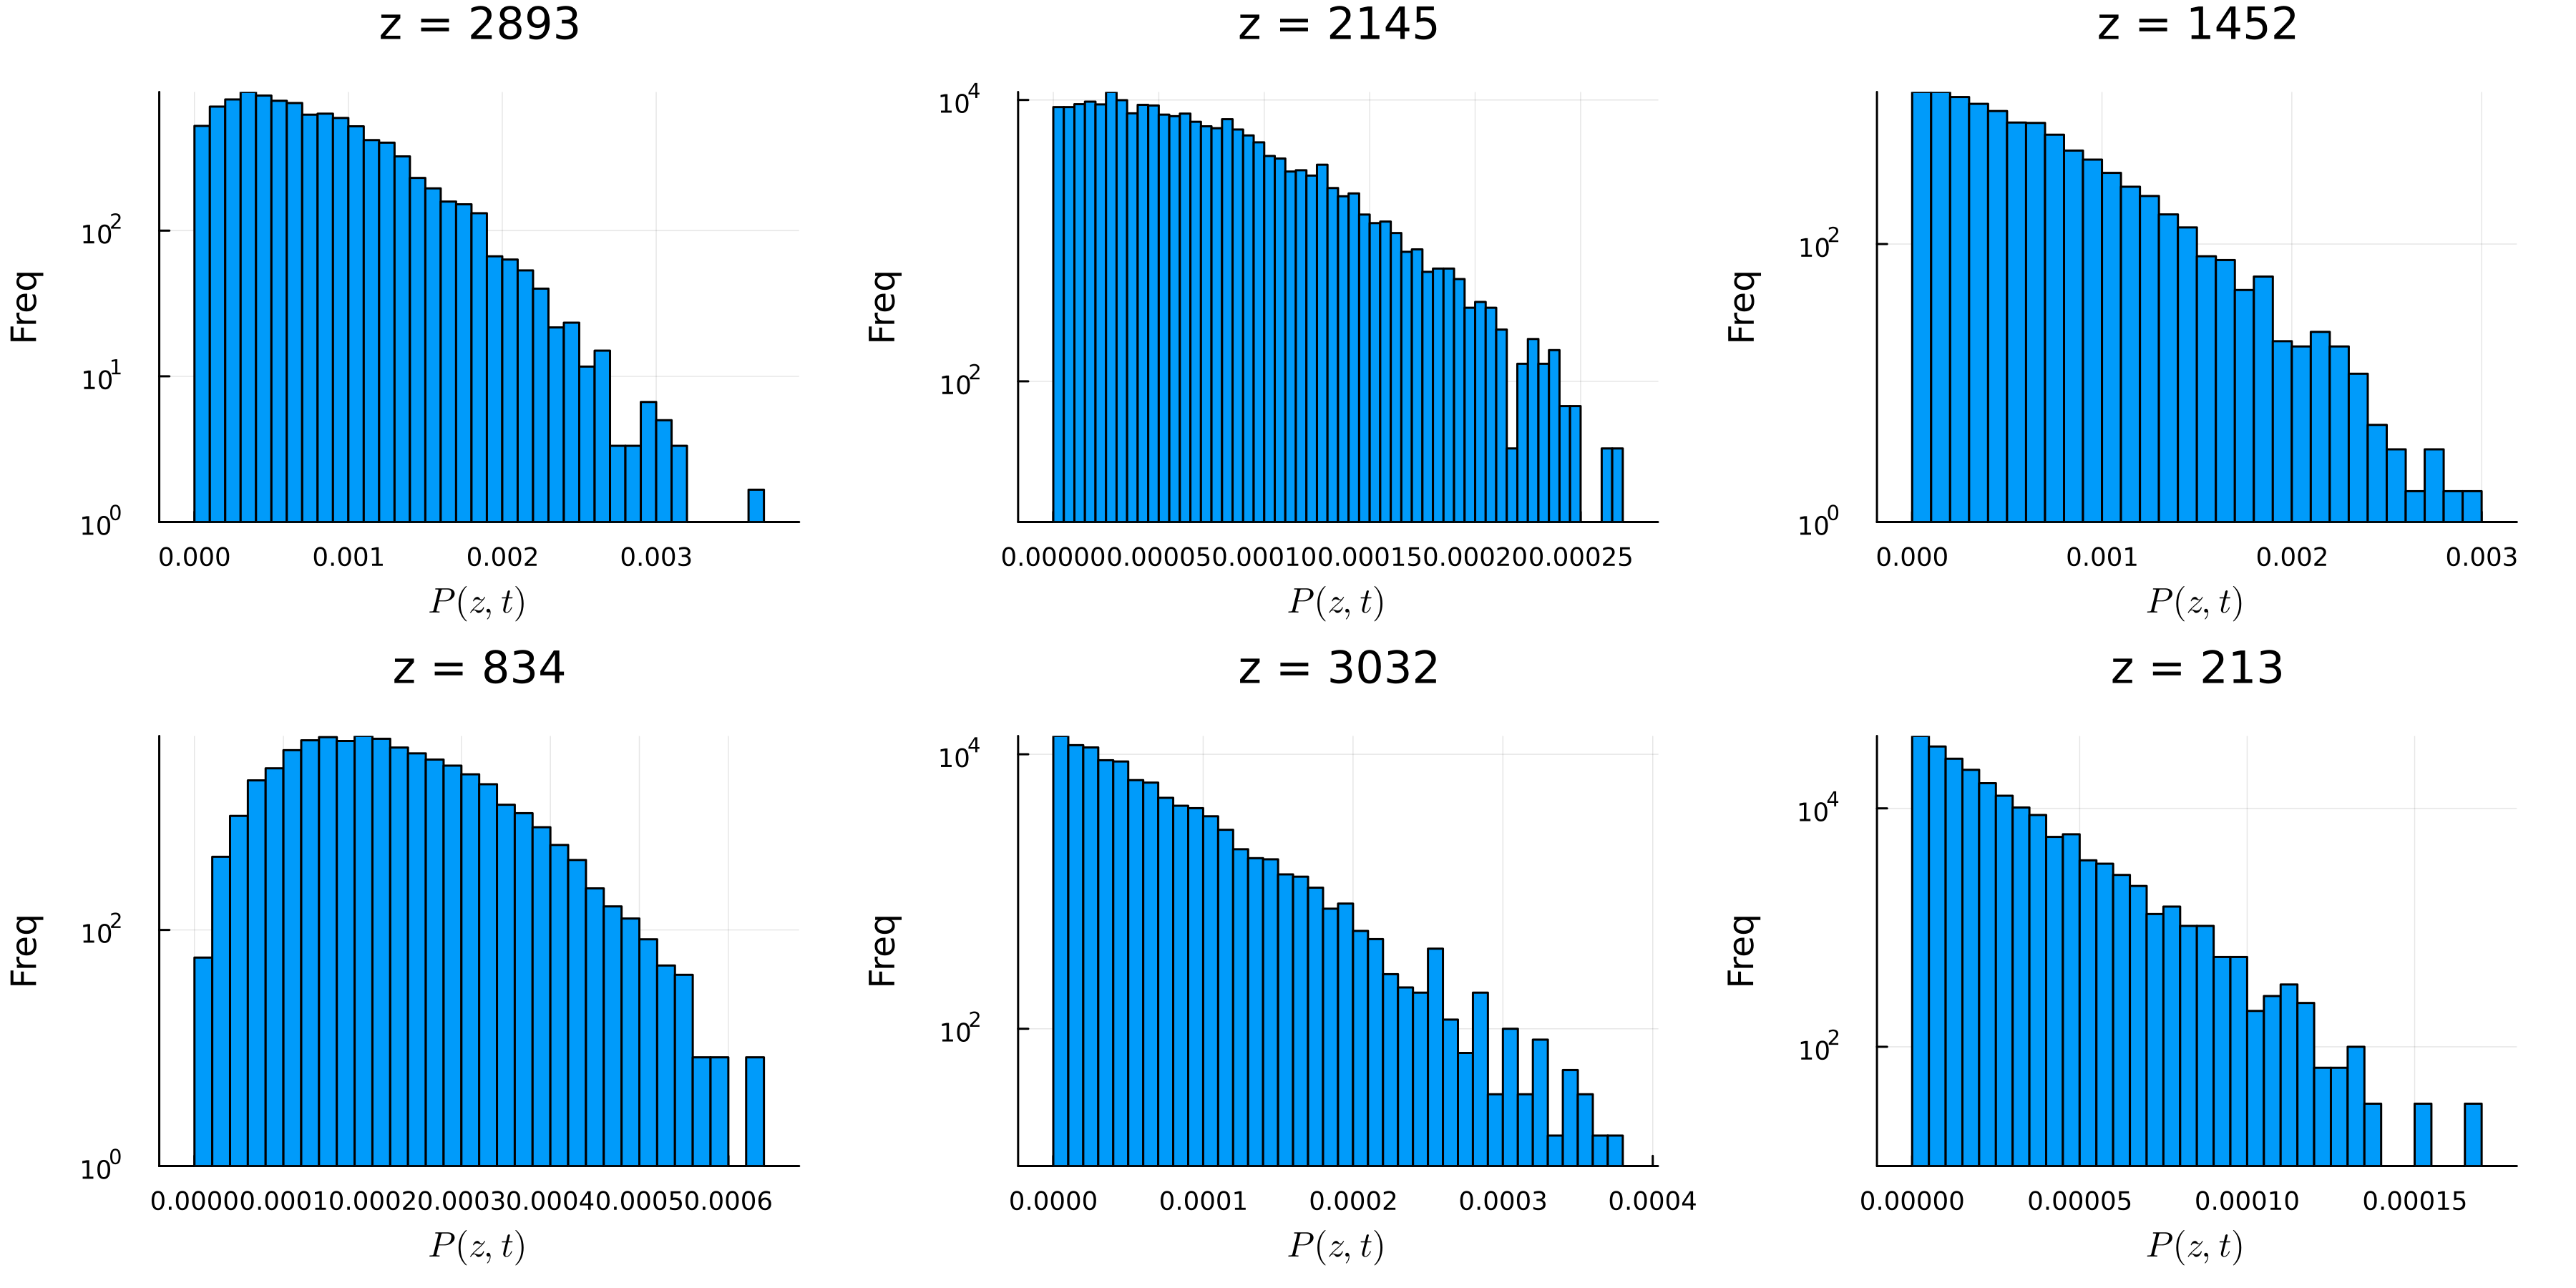

"/Users/jessica/Desktop/jan 9 2025/git/Square-Spin-Ice/New code/W=1_pzt_distributions.png"

In [34]:
using Measures

time_steps = 1:6000
z_list = [2893, 2145,1452,834,3032,213]
probs_list = []

for z in z_list
    probs = Float64[]
    for t in time_steps
        time_evolved_state = time_evolve_state(initial_state, eigtemp.values, t)
        prob = get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs, prob)
    end
    push!(probs_list, probs)
end

# Plot in 2x3 grid
p=plot(layout = (2, 3), size = (1200, 600))
for (i, probs) in enumerate(probs_list)
    histogram!(probs, bins=50, layout = (2, 3), subplot = i, 
               title = "z = $(z_list[i])", xlabel = L"P(z,t)", ylabel = "Freq",yaxis=:log,
               legend = false, normalize = true,margin=5mm, dpi=300)
end
display(p)
savefig("W=1_pzt_distributions.png")

In [82]:
# Parameters
z_list = 1:2^12
T_max = 1000
time_steps = 1:T_max
num_z = length(z_list)
num_t = length(time_steps)

# Initialize probability matrix
probs_matrix = zeros(Float64, num_z, num_t)

# Populate probs_matrix[z, t] = p(z, t)
for (i, z) in enumerate(z_list)
    for (j, t) in enumerate(time_steps)
        time_evolved_state = time_evolve_state(initial_state, eigtemp.values, t)
        prob = get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        probs_matrix[i, j] = prob
    end
end

# Normalize into a joint probability distribution
probs_matrix ./= sum(probs_matrix)

# Estimate mutual information I(Z; T)
function estimate_mutual_information(p_joint::Matrix{Float64})
    p_z = sum(p_joint, dims=2)
    p_t = sum(p_joint, dims=1)
    I = 0.0
    for i in 1:size(p_joint, 1), j in 1:size(p_joint, 2)
        pzt = p_joint[i, j]
        if pzt > 0
            I += pzt * log2(pzt / (p_z[i] * p_t[j]))
        end
    end
    return I
end

I_Z_T = estimate_mutual_information(probs_matrix)
println("Estimated mutual information I(Z; T) ≈ ", I_Z_T, " bits")

Estimated mutual information I(Z; T) ≈ 0.3977533634035384 bits


# Effective Dimension

In [95]:
states=1:2^N
v=0
for s in states
    v_temp=0
    
    probs = Float64[]
    time_steps=1:200
    for t in time_steps
        time_evolved_state = time_evolve_state(initial_state, eigtemp.values, t)
        prob = get_probability_of_n_computational_basis(s, time_evolved_state, eigtemp.vectors)
        push!(probs, prob)
    end
    avg=mean(probs)
    for j=1:2^N
        #get the eigenvector
        v_temp+=(abs2(eigtemp.vectors[s, j])*abs2(initial_state[j])^2)
    end
    v+=v_temp/avg
end
println("Estimated effective dimension: ", v)        

Estimated effective dimension: 72.32585233351433
